# Concepto basico

Al trabajar con secuentas de cadenas nos encontraremos con el siguiente diagrama de flujo donde podemos encontrar ver que la salida de una cadena es la entrada de otra

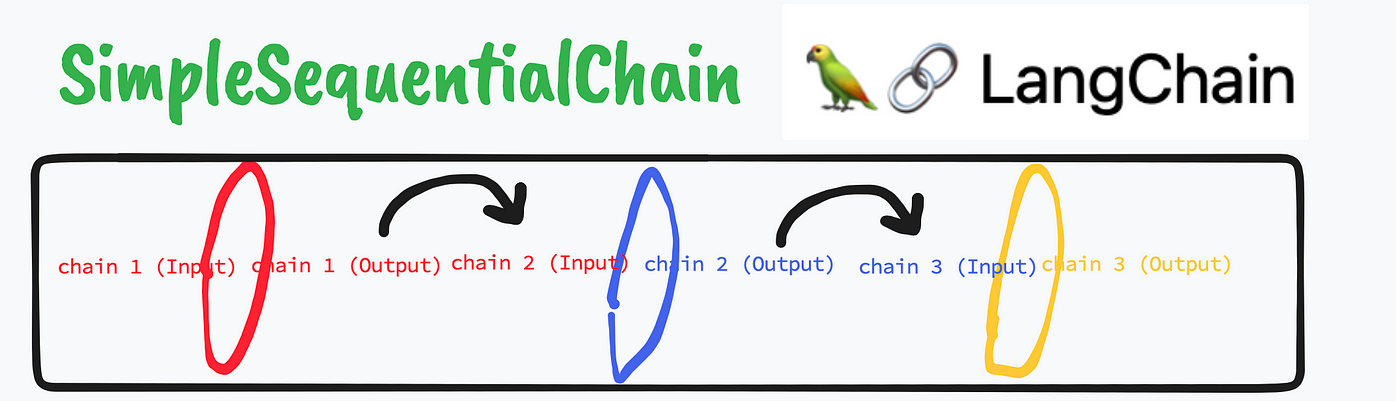

# Configuracion Inicial

In [ ]:
# Instalacion de paquetes necesarios

!pip install langchain
!pip install openai

In [3]:
# Carga de variables de entorno
from dotenv import load_dotenv
import os

load_dotenv()

openai_api_key=os.getenv('OPENAI_API_KEY', 'YourAPIKey')

In [4]:
# Importacion de librerias
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from langchain import PromptTemplate
from langchain.chains import SimpleSequentialChain, LLMChain

In [19]:
modelo_1 = OpenAI(model_name ='text-davinci-003',
                  temperature = 0.2
                  )
modelo_2 = ChatOpenAI(model_name  = "gpt-3.5-turbo", temperature = 0.3)

# Caso de suso recomendacion de peliculas
Para este caso de uso, trabajaremos con dos cadenas:

* Cadena #1 - Una cadena LLM que pregunta al usuario por sus géneros cinematográficos favoritos y genera una lista de peliculas por genero. 
* Cadena #2 - Esta cadena usa la lista dada para seleccionar la mejor de cada genero y dar un resumen de estas.

## Cadena 1

In [20]:
template1 = '''Eres un experto crítico de cine y te han pedido que hagas una lista de las mejores 8 películas, basándote en los siguientes géneros:{genero}, ordena la lista por género'''
prompt_template = PromptTemplate(input_variables=['genero'], template=template1)
chain_1 = LLMChain(llm=modelo_1, prompt=prompt_template)

## Cadena 2

In [28]:
template2 = '''Eres un recomendador de películas. Entre las siguientes lista películas : {peliculas}

¿cuál recomendaría?, Ordena la lista por género dado y elige la mejor película de cada género, crea un resumen de la mejor película de cada género'''
prompt_template2 = PromptTemplate(input_variables=['peliculas'], template=template2)
chain_2 = LLMChain(llm=modelo_2, prompt=prompt_template)

## Unimos las cadenas

In [29]:
# Creacion de la cadena
cadena_completa = SimpleSequentialChain(chains = [chain_1, chain_2], verbose= True) # verbose significa que me valla mostrando los pasos a medida que valla avanzando

respuesta = cadena_completa.run("Comedia y acción")

print(respuesta)



> Entering new SimpleSequentialChain chain...


1. Acción: Mad Max: Fury Road (2015)
2. Acción: The Dark Knight (2008)
3. Acción: The Matrix (1999)
4. Acción: Die Hard (1988)
5. Comedia: The Hangover (2009)
6. Comedia: Airplane! (1980)
7. Comedia: Monty Python and the Holy Grail (1975)
8. Comedia: Groundhog Day (1993)
1. Acción: The Dark Knight (2008)
2. Acción: The Matrix (1999)
3. Acción: Mad Max: Fury Road (2015)
4. Acción: Die Hard (1988)
5. Comedia: Monty Python and the Holy Grail (1975)
6. Comedia: Groundhog Day (1993)
7. Comedia: Airplane! (1980)
8. Comedia: The Hangover (2009)

> Finished chain.
1. Acción: The Dark Knight (2008)
2. Acción: The Matrix (1999)
3. Acción: Mad Max: Fury Road (2015)
4. Acción: Die Hard (1988)
5. Comedia: Monty Python and the Holy Grail (1975)
6. Comedia: Groundhog Day (1993)
7. Comedia: Airplane! (1980)
8. Comedia: The Hangover (2009)


# Caso de uso Crea guiones y descripcoines automáticas para tus vídeos de youtube

Aprovechar la respuesta que da la inteligencia para generar otro prompt y que te entregue otra respuesta que puedas utilizar.
Esto quiere decir que: Le vamos a entregar un tema y el nos va entregar los guiones y las descripciones para los videos

* Cadena #1 - Ecribira los puntos más importantes para un tema dado. 
* Cadena #2 - Ecribira un guion basado en los puntos suministrados por la cadena 1
* Cadena #3 - Suando el guion creado por la cadena anterior esta cadena crear el titulo y descripcion para un video de youtube utilizando las mejores practicas de SEO


In [31]:
modelo_1 = OpenAI(model_name ='text-davinci-003',
                  temperature = 0.7,
                  max_tokens = 1024
                  )
modelo_2 = ChatOpenAI(model_name  = "gpt-3.5-turbo", temperature = 1.2)
modelo_3 = ChatOpenAI(model_name  = "gpt-4", temperature = 1.2)


## Cadena 1


In [32]:
plantilla = '''
Escribe los puntos mas importantes para {tema}.
'''
prompt = PromptTemplate(
    input_variables = ['tema'],
    template = plantilla
)
cadena_1 = LLMChain(llm = modelo_1, prompt = prompt)

## Cadena 2

In [34]:
plantilla_2 = '''
Necesito que seas un experto guionista y
creador de conotenidos para redes sociales como youtube.
Necesito que hagas el script completo para youtube
sobre este tema, necesito explicar todo con lujo de detalles: {puntos}
'''
prompt_2 = PromptTemplate(
    input_variables = ['puntos'],
    template = plantilla_2
)
cadena_2 = LLMChain(llm = modelo_2, prompt = prompt_2)

## Cadena 3

In [35]:
plantilla_3 = '''
Necesito que seas experto en SEO. necesito que bajo todo el conocimiento de YouTube que tienes me hagas un Título
(100 caracteres incluyendo espacio) y una descripcion (entre 4000 a 5000 caracteres).
no anotes el numero de caracteres, para el script anteriror. Que el titulo este en forma de pregunta en base a
la busqueda de YouTube y lo resuelva el video.
como por ejemplo: ¿Cómo vender más?: {script}.'''
prompt_3 = PromptTemplate(
    input_variables = ['script'],
    template = plantilla_3
)
cadena_3 = LLMChain(llm = modelo_3, prompt = prompt_3)

## Unimos las cadenas

In [ ]:
cadena_completa = SimpleSequentialChain(chains = [cadena_1, cadena_2, cadena_3], verbose= True)
respuesta = cadena_completa.run("una campaña de marketing exitosa")
print(respuesta)